**STOCHASTIC GRADIENT DESCENDENT**

In [25]:
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
range = max_ - min_
df_train = (df_train - min_) / range
df_valid = (df_valid - min_) / range

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [26]:
X_train.shape

(1119, 11)

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(512, activation='relu', input_shape=[11]),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1),
])

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(
  optimizer='adam',
  loss='mae'
)

In [29]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  epochs=20
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3344 - val_loss: 0.1388
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1366 - val_loss: 0.1225
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1247 - val_loss: 0.1150
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1107 - val_loss: 0.1061
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1097 - val_loss: 0.1030
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1049 - val_loss: 0.1053
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1073 - val_loss: 0.1020
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1027 - val_loss: 0.1040
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1006 - val_loss: 0.1034
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0987 - val_loss: 0.1002
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0977 - val_loss: 0.0978
E

<Axes: >

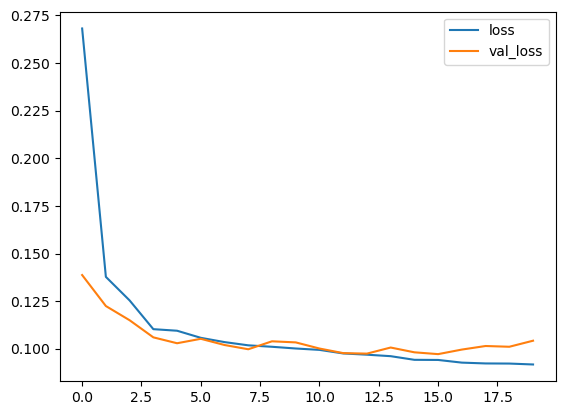

In [30]:
history_df = pd.DataFrame(history.history)
history_df.plot()

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

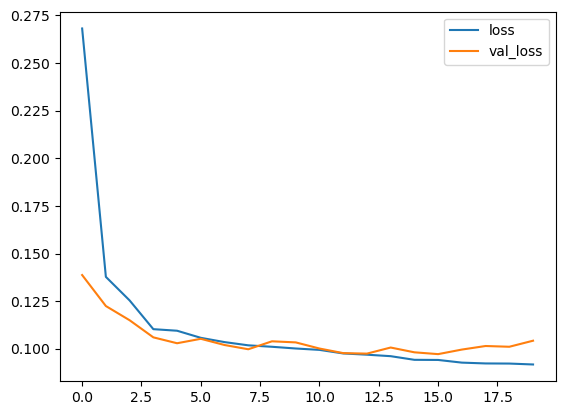

In [34]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
  min_delta=0.001,
  patience=20,
  restore_best_weights=True,
)
model2 = keras.Sequential([
  layers.Dense(512, activation='relu', input_shape=[11]),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1),
])
model2.compile(
  optimizer='adam',
  loss='mae'
)
history2 = model2.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  callbacks=[early_stopping],
  verbose=0
)
history2_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot()